In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from scipy.signal import find_peaks

In [4]:
import os
os.getcwd()
os.chdir(r"C:\Users\valer\OneDrive\Dokumente\CVs _ Applications\Correlaid 2021")

In [5]:
covid = pd.read_csv("WHO-COVID-19-global-data.csv")

In [6]:
covid = covid[covid["Country"] == "Suriname"]

In [7]:
covid.dtypes

Date_reported        object
Country_code         object
Country              object
WHO_region           object
New_cases             int64
Cumulative_cases      int64
New_deaths            int64
Cumulative_deaths     int64
dtype: object

In [8]:
covid["Date_reported"] = pd.to_datetime(covid["Date_reported"])

In [9]:
covid["New_cases"].max()

649

In [10]:
covid[covid["New_cases"] == 649]["Date_reported"]

142277   2021-09-16
Name: Date_reported, dtype: datetime64[ns]

In [11]:
covid[covid["New_cases"] == 649]

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
142277,2021-09-16,SR,Suriname,AMRO,649,34637,7,773


In [12]:
covid.iloc[622]

Date_reported        2021-09-16 00:00:00
Country_code                          SR
Country                         Suriname
WHO_region                          AMRO
New_cases                            649
Cumulative_cases                   34637
New_deaths                             7
Cumulative_deaths                    773
Name: 142277, dtype: object

In [13]:
peaks = find_peaks(covid["New_cases"], distance = 50) #function that takes array and returns local peaks (as indices)

In [14]:
peaks

(array([ 72, 178, 230, 281, 377, 469, 520, 622, 677], dtype=int64), {})

In [15]:
covid.iloc[72]

Date_reported        2020-03-15 00:00:00
Country_code                          SR
Country                         Suriname
WHO_region                          AMRO
New_cases                              5
Cumulative_cases                       5
New_deaths                             0
Cumulative_deaths                      0
Name: 141727, dtype: object

In [16]:
covid_2021 = covid[covid["Date_reported"].dt.year == 2021]

Dates of covid measures:

13 March 2020: first covid case
14 March 2020: Airports and borders closed
28 March 2020 - 10 May: partial lockdown
4 - 21 June 2020: Total Lockdown
21 July - 10 August 2020: Partial lockdown
4 Sep - 7 Sep 2020: Full lockdown (https://www.garda.com/crisis24/news-alerts/376066/suriname-authorities-impose-total-lockdown-until-september-7-update-6)
20 Oct 2020 - 22 Nov: restrictions reintroduced
31 May - 18 June 2021: full lockdown (https://today.caricom.org/2021/05/31/suriname-announces-total-covid-19-lockdown/)
https://askabout.io/covid-19/ask/what-is-the-government-response-timeline-for-suriname/

https://graphics.reuters.com/world-coronavirus-tracker-and-maps/countries-and-territories/suriname/
https://www.coronanet-project.org/data/reports/finished/20201024_Suriname.html

In [83]:
import matplotlib.patches as patches

NameError: name 'spines' is not defined

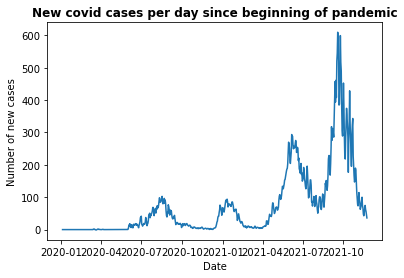

In [87]:
plt.plot(covid["Date_reported"], covid["New_cases"].rolling(3).mean())
plt.xlabel("Date")
plt.ylabel("Number of new cases")
plt.title("New covid cases per day since beginning of pandemic", weight = "bold")
plt.text(x = 18250, y = 400, s = "first\ncovid\ncase", color = "red")
plt.text(x = 18320, y = 550, s = "all borders\nclosed", color = "red")
plt.text(x = 18500, y = 580, s = "grey: lockdowns")
plt.axvline(x = 18320, color = "red", alpha = 0.5, ymax = 0.8) #March 2020: first covid case
plt.axvline(x = 18350, color = "red", alpha = 0.5, ymax = 0.8) #March 14: closing of all borders
plt.axvspan(xmin = 18380, xmax = 18400, color = "grey", alpha = 0.3, ymax = 0.8)  # March 28 - 10 May 2020: partial lockdown
plt.axvspan(xmin = 18415, xmax = 18420, color = "grey", alpha = 0.3, ymax = 0.8) # June 2020: Total lockdown -> correct
plt.axvspan(xmin = 18458, xmax = 18470, color = "grey", alpha = 0.3, ymax = 0.8) #21 July - 10 Aug 2020: partial lockdown -> fine
plt.axvspan(xmin = 18500, xmax = 18505, color = "grey", alpha = 0.3, ymax = 0.8) # short lockdown in Sept -> ok
plt.axvspan(xmin = 18552, xmax = 18590, color = "grey", alpha = 0.3, ymax = 0.8) #restrictions reintroduced, 20 Oct
plt.axvspan(xmin = 18780, xmax = 18800, color = "grey", alpha = 0.3, ymax = 0.8) #lockdown 31 May - 18 June 2021

plt.xticks(["2020-03-01", "2020-03-28", "2020-05-10", "2020-06-04", "2020-06-21", "2020-07-21", "2020-08-10", "2020-09-04", "2020-09-07", "2020-10-20", "2020-11-22", "2021-01-01", "2021-05-31", "2021-06-18"], 
           labels = ["March\n 2020", "", "May", "\nJune", "", "\nJuly", "", "Sept", "", "\nOct", "", "Jan\n2021", "May", ""])
#plt.xticks(["2020-08-20", "2021-01-14", "2021-06-06", "2021-09-16"], rotation = 45, labels = ["20th August", "14th January", "6th June", "16th September"])


([<matplotlib.axis.XTick at 0x167f56c7cd0>,
 [Text(18322.0, 0, 'March\n 2020'),
  Text(18349.0, 0, ''),
  Text(18417.0, 0, 'June'),
  Text(18434.0, 0, ''),
  Text(18464.0, 0, '\nJuly'),
  Text(18484.0, 0, ''),
  Text(18509.0, 0, 'Sept'),
  Text(18512.0, 0, ''),
  Text(18555.0, 0, '\nOct'),
  Text(18588.0, 0, ''),
  Text(18778.0, 0, 'May \n2021'),
  Text(18796.0, 0, '')])

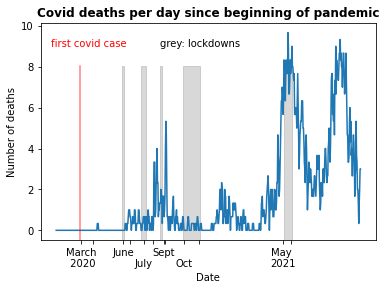

In [80]:
plt.plot(covid["Date_reported"], covid["New_deaths"].rolling(3).mean())
plt.xlabel("Date")
plt.ylabel("Number of deaths")
plt.title("Covid deaths per day since beginning of pandemic", weight = "bold")
plt.axvline(x = 18320, color = "red", alpha = 0.5, ymax = 0.8) #March 2020: first covid case
#plt.axvline(x = 18340, color = "red", alpha = 0.5, ymax = 0.8)  # March 28 2020: partial lockdown
plt.text(x = 18255, y = 9, s = "first covid case", color = "red")
plt.text(x = 18500, y = 9, s = "grey: lockdowns")
plt.axvspan(xmin = 18415, xmax = 18420, color = "grey", alpha = 0.3, ymax = 0.8) # June 2020: Total lockdown -> correct
plt.axvspan(xmin = 18458, xmax = 18470, color = "grey", alpha = 0.3, ymax = 0.8) #21 July - 10 Aug 2020: partial lockdown -> fine
plt.axvspan(xmin = 18500, xmax = 18505, color = "grey", alpha = 0.3, ymax = 0.8) # short lockdown in Sept -> ok
plt.axvspan(xmin = 18552, xmax = 18590, color = "grey", alpha = 0.3, ymax = 0.8) #restrictions reintroduced, 20 Oct
plt.axvspan(xmin = 18780, xmax = 18800, color = "grey", alpha = 0.3, ymax = 0.8) #lockdown 31 May - 18 June 2021

plt.xticks(["2020-03-01", "2020-03-28", "2020-06-04", "2020-06-21", "2020-07-21", "2020-08-10", "2020-09-04", "2020-09-07", "2020-10-20", "2020-11-22", "2021-05-31", "2021-06-18"], 
           labels = ["March\n 2020", "", "June", "", "\nJuly", "", "Sept", "", "\nOct", "", "May \n2021", ""])

Text(0.5, 1.0, 'Number of new cases per day in 2021')

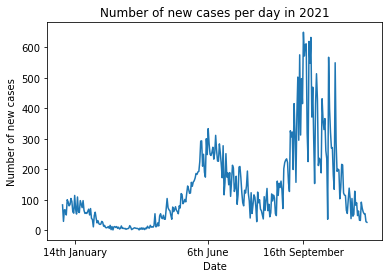

In [18]:
plt.plot(covid_2021["Date_reported"], covid_2021["New_cases"])
plt.xticks(["2021-01-14", "2021-06-06", "2021-09-16"], labels = ["14th January", "6th June", "16th September"])
plt.xlabel("Date")
plt.ylabel("Number of new cases")
plt.title("Number of new cases per day in 2021")

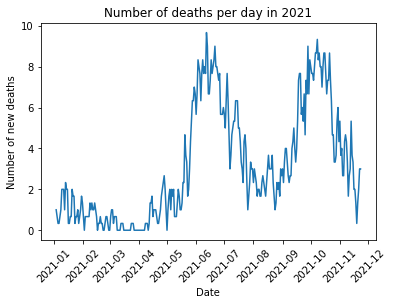

In [62]:
plt.plot(covid_2021["Date_reported"], covid_2021["New_deaths"].rolling(3).mean())
plt.xlabel("Date")
plt.ylabel("Number of new deaths")
plt.xticks(rotation = 45)
plt.title("Number of deaths per day in 2021")
plt.show()

Dates of covid measures:
- 13 March 2020: first covid case
- 14 March 2020: Airports and borders closed
- 28 March 2020: partial lockdown
- 4 - 21 June 2020: Total Lockdown
- 21 July - 10 August 2020: Partial lockdown
- 4 Sep - 7 Sep 2020: Full lockdown (https://www.garda.com/crisis24/news-alerts/376066/suriname-authorities-impose-total-lockdown-until-september-7-update-6)
- 20 Oct 2020 - 22 Nov: restrictions reintroduced
- 31 May - 18 June 2021: full lockdown (https://today.caricom.org/2021/05/31/suriname-announces-total-covid-19-lockdown/)

https://askabout.io/covid-19/ask/what-is-the-government-response-timeline-for-suriname/
- https://graphics.reuters.com/world-coronavirus-tracker-and-maps/countries-and-territories/suriname/